Enter the number of vertices: 4
Enter the number of edges: 5
Enter edges and weights (u v w):
0 1 2
0 3 4
1 2 3
1 3 3
1 4 2

Weights and Edges Table:
Edge 	 Weight
0 - 1	 2
0 - 3	 4
1 - 2	 3
1 - 3	 3
1 - 4	 2


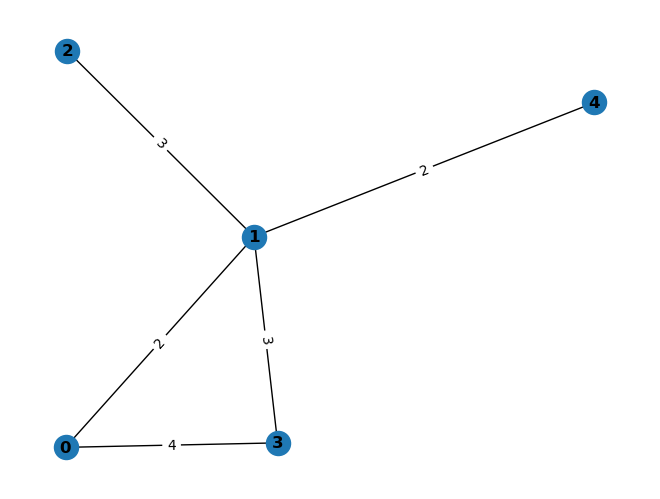

IndexError: list index out of range

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

def find(parent, i):
    if parent[i] == i:
        return i
    return find(parent, parent[i])

def union(parent, rank, x, y):
    x_root = find(parent, x)
    y_root = find(parent, y)

    if rank[x_root] < rank[y_root]:
        parent[x_root] = y_root
    elif rank[x_root] > rank[y_root]:
        parent[y_root] = x_root
    else:
        parent[y_root] = x_root
        rank[x_root] += 1

def kruskal(graph, vertices):
    result = []

    # Sort all edges in increasing order of their weights
    graph = sorted(graph, key=lambda item: item[2])

    parent = []
    rank = []

    for node in range(vertices):
        parent.append(node)
        rank.append(0)

    i = 0
    e = 0

    while e < vertices - 1:
        u, v, w = graph[i]
        i += 1
        x = find(parent, u)
        y = find(parent, v)

        if x != y:
            e += 1
            result.append([u, v, w])
            union(parent, rank, x, y)

    return result

def main():
    vertices = int(input("Enter the number of vertices: "))
    edges = int(input("Enter the number of edges: "))

    graph = []

    print("Enter edges and weights (u v w):")
    for _ in range(edges):
        u, v, w = map(int, input().split())
        graph.append([u, v, w])

    # Displaying the weights and edges table
    print("\nWeights and Edges Table:")
    print("Edge \t Weight")
    for edge in graph:
        print(f"{edge[0]} - {edge[1]}\t {edge[2]}")

    # Creating a graph for visualization
    G = nx.Graph()
    G.add_weighted_edges_from([(u, v, w) for u, v, w in graph])
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

    # Running Kruskal's algorithm
    result = kruskal(graph, vertices)

    # Displaying Minimum Spanning Tree
    print("\nKruskal's Minimum Spanning Tree:")
    for edge in result:
        print(f"{edge[0]} - {edge[1]}\t {edge[2]}")

    # Creating a graph for Minimum Spanning Tree visualization
    MST = nx.Graph()
    MST.add_weighted_edges_from([(u, v, w) for u, v, w in result])
    pos_MST = nx.spring_layout(MST)
    labels_MST = nx.get_edge_attributes(MST, 'weight')
    nx.draw(MST, pos_MST, with_labels=True, font_weight='bold')
    nx.draw_networkx_edge_labels(MST, pos_MST, edge_labels=labels_MST)
    plt.show()

if __name__ == "__main__":
    main()